In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



In [2]:
#import of csv file

PATH = "C:/Users/Sandra/Documents/GitHub/cda2_tennis_challenge/tennis-challenge/HD1080_SN35071549_12-01-04.csv"


data = pd.read_csv(PATH)


key_numbers = data.describe()


print(data.dtypes)
key_numbers

Frame                int64
Object ID            int64
Position X         float64
Position Y         float64
Position Z         float64
Velocity X         float64
Velocity Y         float64
Velocity Z         float64
Bounding Box X1    float64
Bounding Box Y1    float64
Bounding Box Z1    float64
Bounding Box X2    float64
Bounding Box Y2    float64
Bounding Box Z2    float64
Bounding Box X3    float64
Bounding Box Y3    float64
Bounding Box Z3    float64
Bounding Box X4    float64
Bounding Box Y4    float64
Bounding Box Z4    float64
Bounding Box X5    float64
Bounding Box Y5    float64
Bounding Box Z5    float64
Bounding Box X6    float64
Bounding Box Y6    float64
Bounding Box Z6    float64
Bounding Box X7    float64
Bounding Box Y7    float64
Bounding Box Z7    float64
Bounding Box X8    float64
Bounding Box Y8    float64
Bounding Box Z8    float64
dtype: object


,Frame,Object ID,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Bounding Box X1,Bounding Box Y1,...,Bounding Box Z5,Bounding Box X6,Bounding Box Y6,Bounding Box Z6,Bounding Box X7,Bounding Box Y7,Bounding Box Z7,Bounding Box X8,Bounding Box Y8,Bounding Box Z8
count,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,...,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000
mean,459.665711,4.896622,-3.116134,-3.368489,14.228551,0.019170,-0.007089,0.027885,-3.412098,-3.993343,...,14.092010,-3.487745,-2.814282,14.746622,-2.806594,-2.779662,14.756761,-2.806594,-2.587958,14.102149
std,273.500860,5.348019,5.315774,2.013376,6.544497,0.798947,0.180991,0.593480,5.321733,1.995747,...,6.550900,5.326226,2.032318,6.520995,5.304918,2.033774,6.520556,5.304918,2.042330,6.550413
min,0.000000,0.000000,-8.986670,-6.904720,0.817250,-2.872257,-2.605275,-5.933895,-9.295782,-7.480688,...,0.651249,-9.374355,-6.440049,1.114594,-8.713121,-6.404424,1.121782,-8.713121,-6.207281,0.658438
25%,214.000000,1.000000,-8.391378,-3.884701,13.751034,-0.135507,-0.068008,-0.140257,-8.658263,-4.458363,...,13.656303,-8.740040,-3.374458,14.241682,-8.074333,-3.341288,14.249374,-8.074333,-3.160378,13.664698
50%,451.000000,4.000000,-2.227338,-3.607124,14.131413,-0.000532,-0.011512,0.036698,-2.584368,-4.271049,...,13.978925,-2.673654,-3.011728,14.664165,-1.858786,-2.972621,14.676143,-1.858786,-2.763531,13.988044
75%,701.000000,6.000000,1.738566,-2.854363,15.084062,0.196166,0.055752,0.212797,1.388282,-3.315105,...,14.971718,1.297005,-2.445156,15.478524,2.073359,-2.419783,15.485957,2.073359,-2.279259,14.979168
max,933.000000,23.000000,5.724331,1.175089,26.360886,8.329982,1.756359,8.904224,5.502560,1.158237,...,26.174547,5.446335,1.190862,26.966963,5.945590,1.195700,26.979198,5.945590,1.222632,26.186780


In [3]:
#get a dictionary of the objects in each frame of data
object_per_frame_dic = data.groupby("Frame")["Object ID"].agg(list).to_dict()

frames_per_object_dic = data.groupby("Object ID")["Frame"].agg(list).to_dict()


#list of the objects and the count of the frames they appear in
object_frame_count = data.groupby("Object ID")["Frame"].count()
frame_object_count = data.groupby("Frame")["Object ID"].count()


# object_per_frame_dic
# frames_per_object_dic

# object_frame_count.sort_values(ascending=True)      #vermutung, dass Objekte die selten vorkommen falsch detektiert wurdem bzw irrelevant sind/ selbe person neu erkannt? prüfen
# frame_object_count.sort_values(ascending=False)   #wenn Laptop vorhanden prüfen, ob tatsächlich 8 objecte om frame 174 vorhanden sind

# First Visualization of the data

## Bewegungsanalyse

### Positionsverlauf

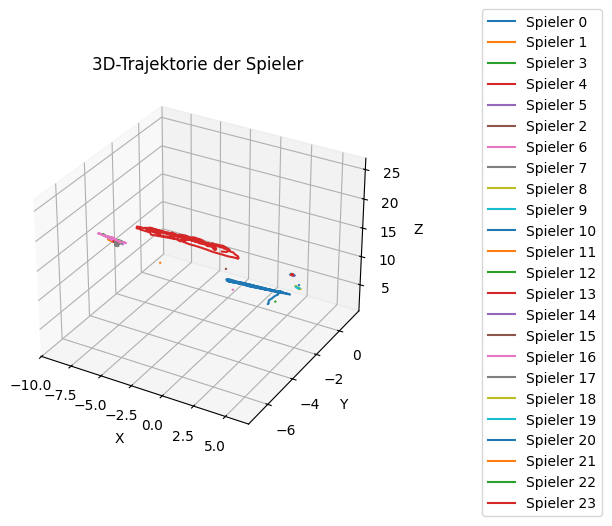

In [17]:
# need to search for the bug
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for player_id in data['Object ID'].unique():
    player_data = data[data['Object ID'] == player_id]
    ax.plot(player_data['Position X'], player_data['Position Y'], player_data['Position Z'], label=f'Spieler {player_id}')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend(loc = "center left", bbox_to_anchor = (1.25, 0.5))
# ax.legend(loc='center left', bbox_to_anchor=(-0.3, 0.5))

plt.title("3D-Trajektorie der Spieler")
plt.show()

### Geschwindigkeitsprofile

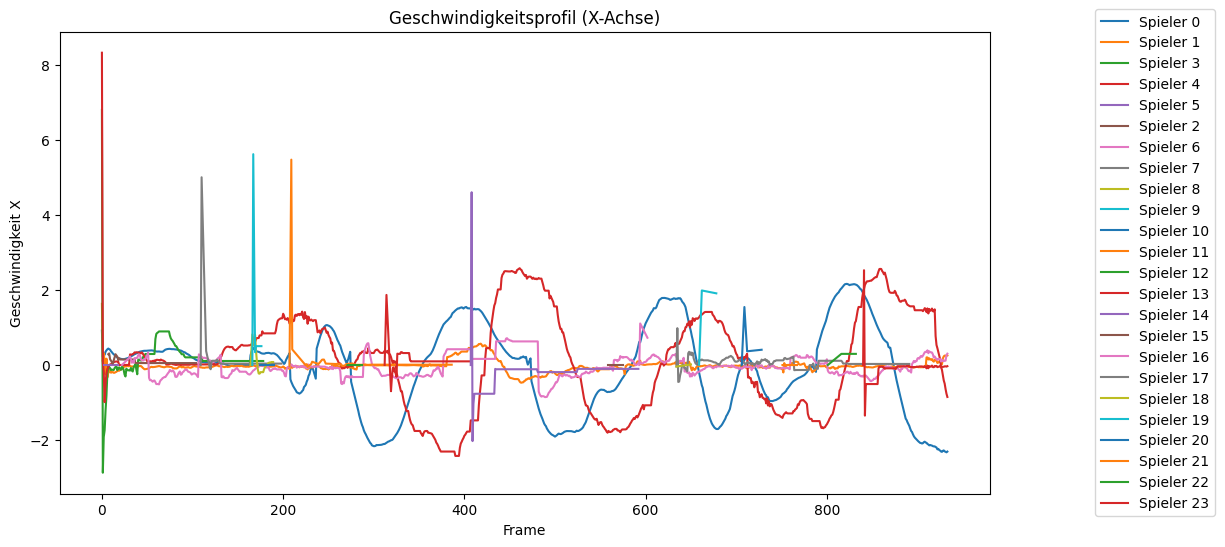

In [21]:
plt.figure(figsize=(12, 6))
for player_id in data['Object ID'].unique():
    player_data = data[data['Object ID'] == player_id]
    sns.lineplot(data=player_data, x='Frame', y='Velocity X', label=f'Spieler {player_id}')

plt.title('Geschwindigkeitsprofil (X-Achse)')
plt.xlabel('Frame')
plt.ylabel('Geschwindigkeit X')
plt.legend(loc = "center right", bbox_to_anchor = (1.25, 0.5))
plt.show()

##  Räumliche Analyse


### Heatmap der Spielerpositionen

Nächster Schritt: Tennisfeld hinterlegen, damit man die Heatmap auf dem Feld sieht (to be Integrated in the Dashboard)


C:\Users\Sandra\AppData\Local\Temp\ipykernel_27608\277244235.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='Position X', y='Position Y', cmap="YlOrRd", shade=True)


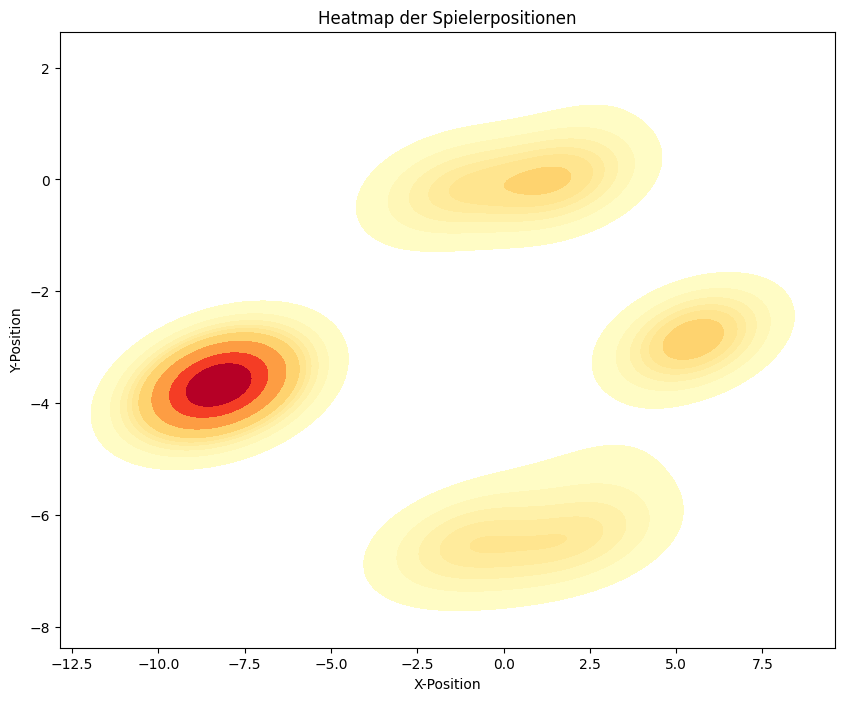

In [12]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=data, x='Position X', y='Position Y', cmap="YlOrRd", shade=True)
plt.title('Heatmap der Spielerpositionen')
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.show()

### 3D-Scatterplot der Bounding-Boxen


C:\Users\Sandra\AppData\Local\Temp\ipykernel_27608\327914883.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap='viridis')


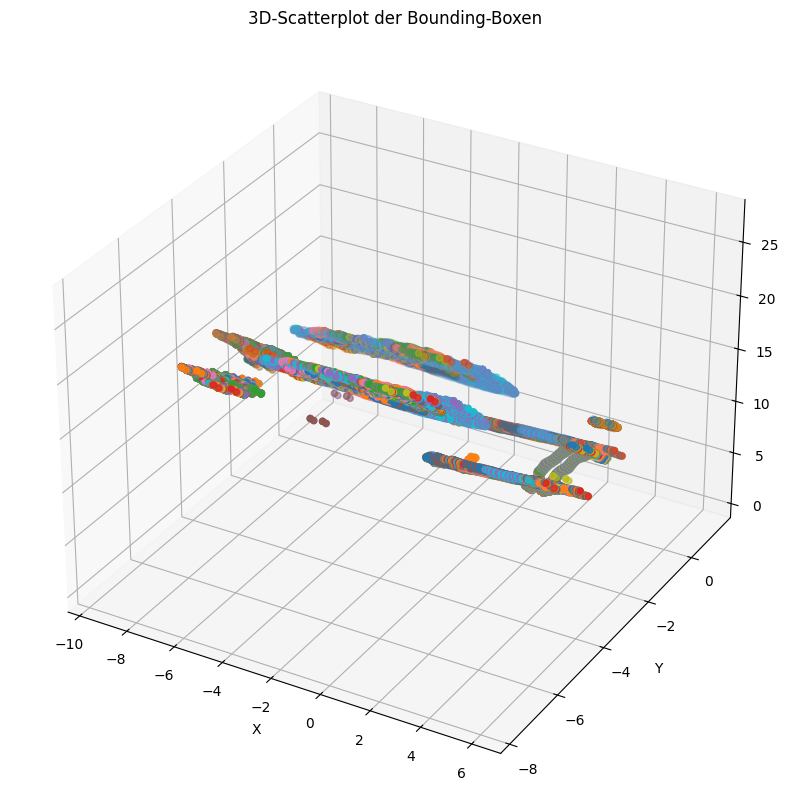

In [24]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for _, row in data.iterrows():
    x = [row[f'Bounding Box X{i}'] for i in range(1, 9)]
    y = [row[f'Bounding Box Y{i}'] for i in range(1, 9)]
    z = [row[f'Bounding Box Z{i}'] for i in range(1, 9)]
    ax.scatter(x, y, z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D-Scatterplot der Bounding-Boxen')
plt.show()

## Zeitliche Analyse

### Abstandsanalyse zwischen Spielern

Nächster Schritt: den Abstan der Spieler je Frame betrachten und denn auf dem Feld ploten und die Distanz anzeigen

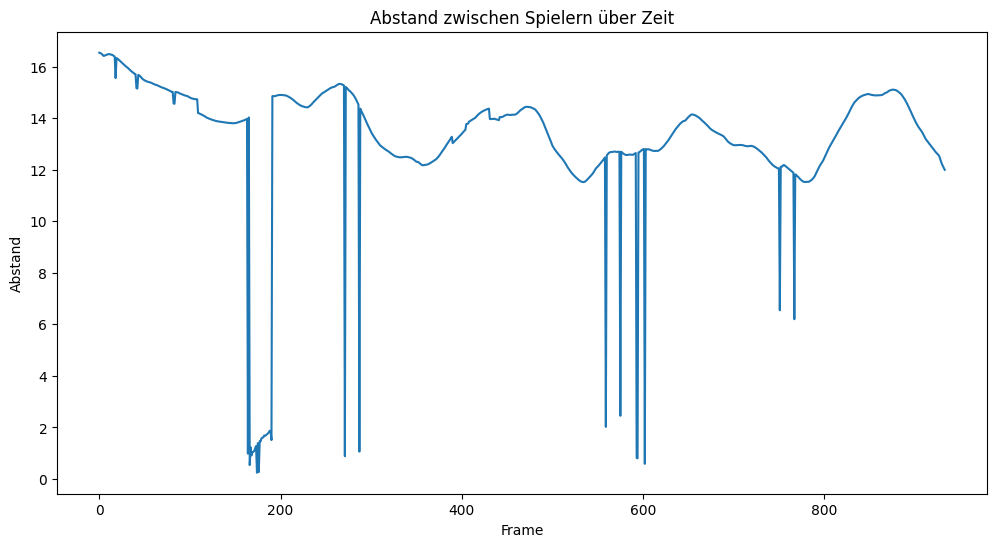

In [14]:
def calculate_distance(row1, row2):
    return np.sqrt((row1['Position X'] - row2['Position X'])**2 + 
                   (row1['Position Y'] - row2['Position Y'])**2 + 
                   (row1['Position Z'] - row2['Position Z'])**2)

distances = []
frames = data['Frame'].unique()

for frame in frames:
    frame_data = data[data['Frame'] == frame]
    if len(frame_data) >= 2:
        distance = calculate_distance(frame_data.iloc[0], frame_data.iloc[1])
        distances.append((frame, distance))

distance_df = pd.DataFrame(distances, columns=['Frame', 'Distance'])
plt.figure(figsize=(12, 6))
plt.plot(distance_df['Frame'], distance_df['Distance'])
plt.title('Abstand zwischen Spielern über Zeit')
plt.xlabel('Frame')
plt.ylabel('Abstand')
plt.show()

## Statistische Auswertung

### Verteilung der Geschwindigkeiten


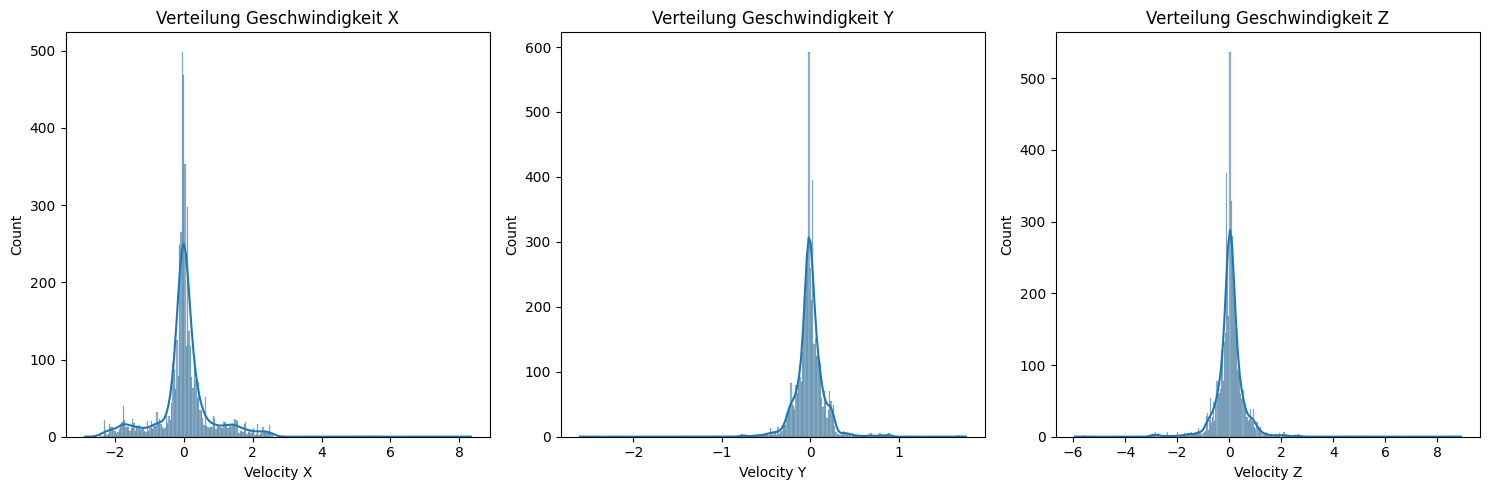

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(data=data, x='Velocity X', kde=True)
plt.title('Verteilung Geschwindigkeit X')


plt.subplot(132)
sns.histplot(data=data, x='Velocity Y', kde=True)
plt.title('Verteilung Geschwindigkeit Y')


plt.subplot(133)
sns.histplot(data=data, x='Velocity Z', kde=True)
plt.title('Verteilung Geschwindigkeit Z')


plt.tight_layout()
plt.show()

### Korrelationsanalyse

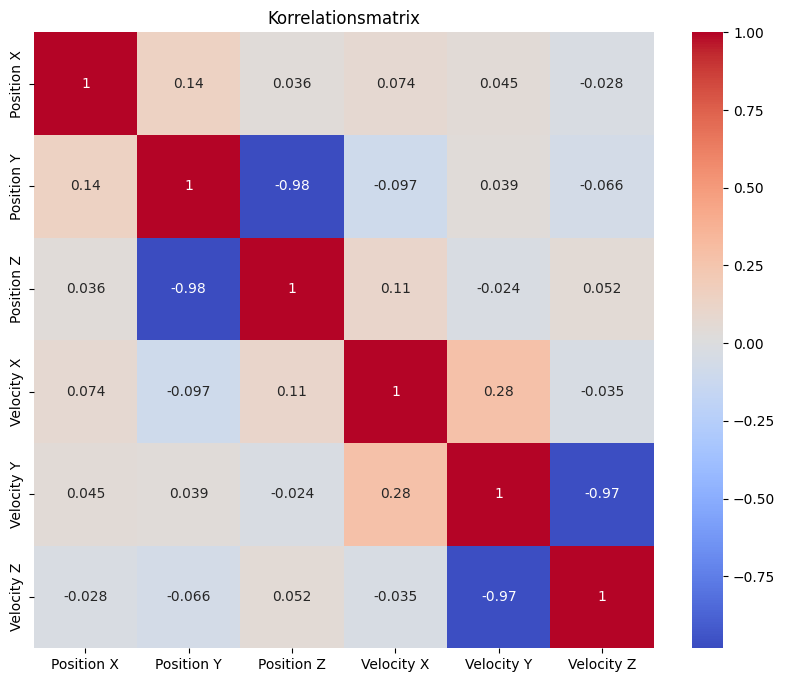

In [23]:
correlation_matrix = data[['Position X', 'Position Y', 'Position Z', 
                           'Velocity X', 'Velocity Y', 'Velocity Z']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()